# Calcolare la superficie di un lago

Importiamo alcune librerie che ci saranno utili per lo svolgimento dell'esercizio

In [2]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from tqdm import tqdm

In [3]:
database = gpd.read_file("ITA_wat/ITA_water_areas_dcw.shp")
database

,ISO,COUNTRY,F_CODE_DES,HYC_DESCRI,NAME,geometry
0,ITA,Italy,Inland Water,Perennial/Permanent,LAGO DI RESIA,"POLYGON ((10.53839 46.78942, 10.53050 46.78025..."
1,ITA,Italy,Inland Water,Perennial/Permanent,LAGO DELLA MUTTA,"POLYGON ((10.53589 46.75206, 10.53211 46.74781..."
2,ITA,Italy,Inland Water,Perennial/Permanent,LAKE COMO,"POLYGON ((9.39694 45.84864, 9.39256 45.85064, ..."
3,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((10.27628 46.53944, 10.27467 46.53647..."
4,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((12.44761 46.54783, 12.45222 46.54620..."
...,...,...,...,...,...,...
246,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((14.35139 37.01828, 14.34908 37.01745..."
247,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((14.38464 37.00769, 14.37567 36.99878..."
248,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((15.09536 36.79347, 15.09028 36.78906..."
249,ITA,Italy,Inland Water,Perennial/Permanent,UNK,"POLYGON ((14.94517 36.73056, 14.94144 36.73045..."


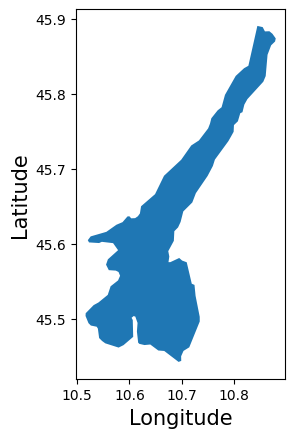

In [4]:
lago_di_garda = database[database['NAME'] == "LAGO DI GARDA"]
lago_di_garda.plot()
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.show()

In [5]:
box = lago_di_garda.total_bounds
print(box)

[10.5164164  45.44286002 10.8789724  45.89044602]


Estraiamo anche il perimetro che delimita la superficie del lago:

In [6]:
perimeter = lago_di_garda.geometry.values[0]


Possiamo utilizzare questa informazione per andare a generare dei punti al suo interno in modo casuale:

In [7]:
N = 1000000
coordinata_x = np.random.uniform(box[0],box[2],N)
coordinata_y = np.random.uniform(box[1],box[3],N)

Andiamo a vedere come sono distribuiti i numeri che abbiamo appena generato:

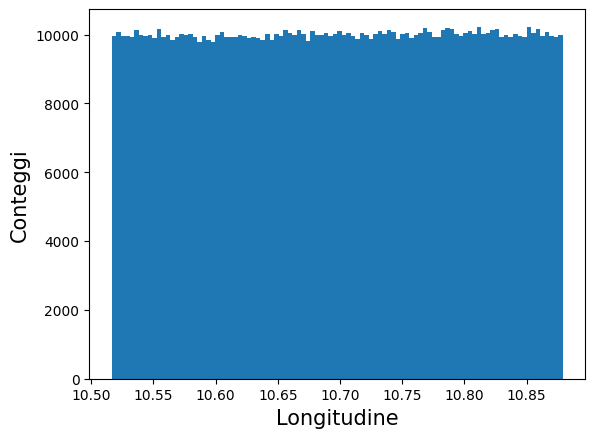

In [8]:
plt.hist(coordinata_x, bins=100)
plt.xlabel("Longitudine",fontsize=15)
plt.ylabel("Conteggi", fontsize=15)
plt.show()

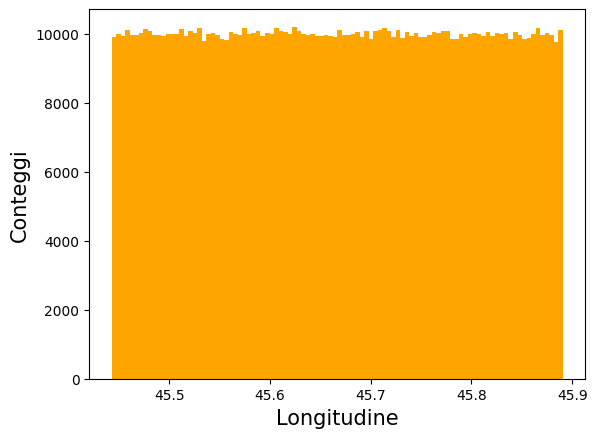

In [9]:
plt.hist(coordinata_y, color='orange', bins=100)
plt.xlabel("Longitudine",fontsize=15)
plt.ylabel("Conteggi", fontsize=15)
plt.show()

Ora andiamo a creare una lista di punti con i numeri appena generati:

In [10]:
punti_generati_casualmente = [ Point(x,y) for x,y in zip(coordinata_x,coordinata_y)]

Vediamo quindi come sono distribuiti all'interno del box che abbiamo definito sopra:

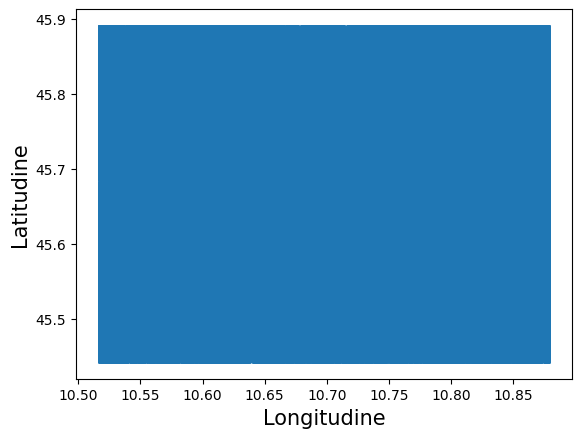

In [11]:
plt.scatter(coordinata_x,coordinata_y, s=1)
plt.xlabel("Longitudine", fontsize=15)
plt.ylabel("Latitudine", fontsize=15)
plt.show()

In [12]:
isInside = False

Inside = 0
inside_history = []

inside_x_list = []
inside_y_list = []

outside_x_list = []
outside_y_list = []

for punto in tqdm(punti_generati_casualmente):
    if(perimeter.contains(punto)):
        Inside += 1
        inside_x_list.append(punto.x)
        inside_y_list.append(punto.y)
    else:
        outside_x_list.append(punto.x)
        outside_y_list.append(punto.y)
        
    inside_history.append(Inside)


100%|██████████| 1000000/1000000 [00:31<00:00, 31510.23it/s]


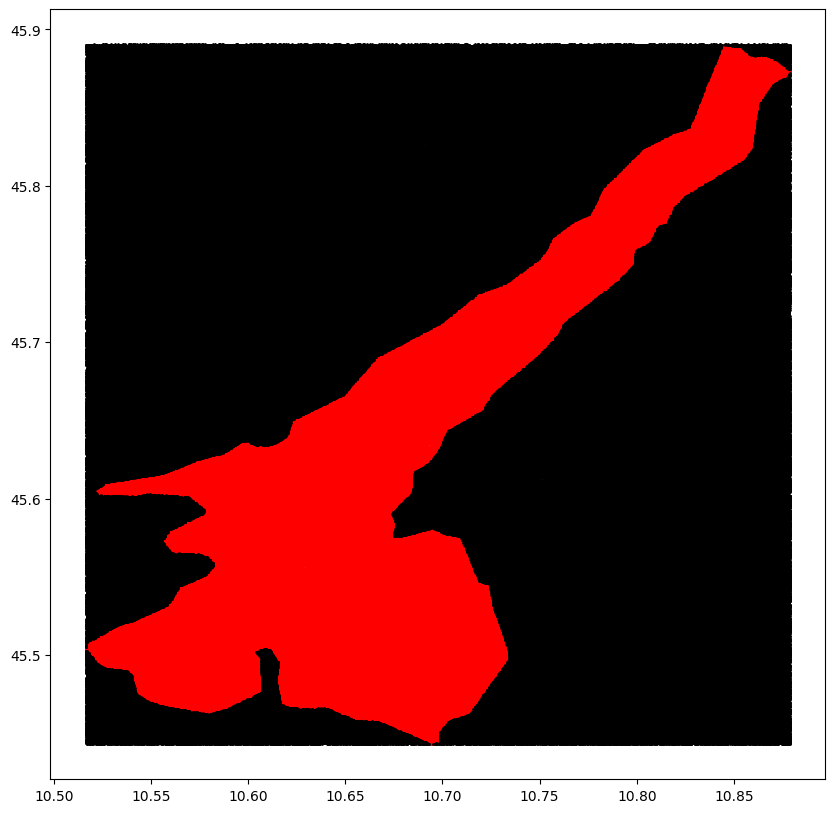

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(inside_x_list,inside_y_list, color='red', s=1)
ax.scatter(outside_x_list,outside_y_list, color='black', s=1)
plt.show()

In [14]:
def compute_distance(lat1,lon1,lat2,lon2):

    # degrees to radians
    lat1 = lat1*(np.pi/180)
    lat2 = lat2*(np.pi/180)
    lon1 = lon1*(np.pi/180)
    lon2 = lon2*(np.pi/180)

    delta_latitude  = np.abs(lat1-lat2)
    delta_longitude = np.abs(lon1-lon2)

    a = (np.sin(delta_latitude/2)*np.sin(delta_latitude/2)) + np.cos(lat1)*np.cos(lat2)*(np.sin(delta_longitude/2)*np.sin(delta_longitude/2))
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

    R = 6371e3 # Earth radius in meters
    d = R*c

    return d

In [15]:
BoxArea = compute_distance(box[1],box[0], box[1],box[2])*compute_distance(box[1],box[0], box[3],box[0])

In [16]:
stima_superficie = [p*BoxArea/i/1e6 for i,p in zip(np.linspace(1,N+1,N+1),inside_history)]

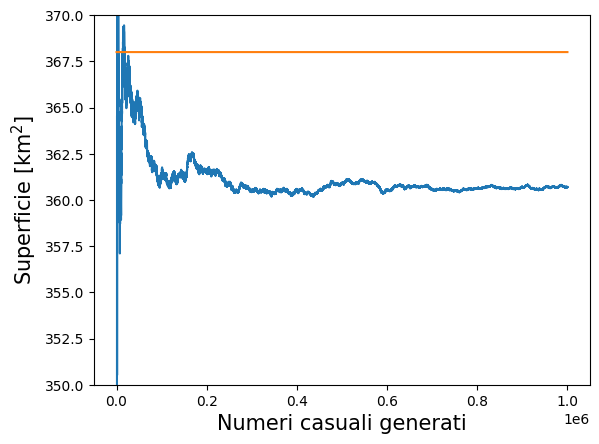

In [17]:
plt.plot(stima_superficie)
plt.plot(np.ones(N)*368)
plt.xlabel("Numeri casuali generati", fontsize=15)
plt.ylabel(r"Superficie [km$^2$]", fontsize=15)
plt.ylim(350,370)
plt.show()